#### 머신러닝

### 라이브러리 선언 및 데이터 불러오기

In [59]:
import pandas as pd
from sklearn import tree
from sklearn.tree import plot_tree
import pickle

In [34]:
from sklearn.model_selection import train_test_split

In [3]:
dataUrl = "https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/feature_regression_example.csv"

In [6]:
featuresData = pd.read_csv(dataUrl)
featuresData.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442


### 1. 데이터 통합 및 숫자컬럼 추가

In [11]:
# 데이터타입 통합 SKIP

In [7]:
ynDict = {"Y":1, "N":0}

In [10]:
featuresData["LE_PROMOTION"] = featuresData.PROMOTION.map(ynDict)
featuresData["LE_HOLIDAY"] = featuresData.HOLIDAY.map(ynDict)

### 2. 특성 선정 및 데이터 분리

In [12]:
corrStd = 0.5

In [17]:
corrDf = featuresData.corr(numeric_only=True)

In [20]:
label = ["QTY"]

In [33]:
# 정답지와 상관계수가 설정값 ( 0.5 ) 보다 큰 feature를 자동으로 찾는 코드
features = list( corrDf.loc[  ( abs( corrDf["QTY"] )  > corrStd ) &
             (corrDf["QTY"] != 1) ].index )

In [38]:
randomValue = 30
testSizeRatio = 0.2

In [39]:
trainData, testData = train_test_split( featuresData,
                                        random_state=randomValue, test_size=testSizeRatio  )

In [40]:
trainDataFeatures = trainData.loc[ :, features ]
trainDataLabel = trainData.loc[ :, label ]
testDataFeatures = testData.loc[ :, features ]
testDataLabel = testData.loc[ :, label ]

In [41]:
print( trainDataFeatures.shape )
print( trainDataLabel.shape )
print( testDataFeatures.shape )
print( testDataLabel.shape )

(84, 4)
(84, 1)
(21, 4)
(21, 1)


### 3. 모델 정의 및 훈련

In [44]:
dtModel = tree.DecisionTreeRegressor(random_state=randomValue)

In [45]:
fittedModel = dtModel.fit(trainDataFeatures,
            trainDataLabel)

### 4. 예측

In [51]:
features

['HCLUS', 'PRO_PERCENT', 'LE_PROMOTION', 'LE_HOLIDAY']

In [57]:
inHclu = 4
inPropercent = 0.0
inPromtion = 0
inHoliday = 0
testDf = pd.DataFrame( [[ inHclu, inPropercent, inPromtion, inHoliday   ]] )

In [58]:
predictValue = fittedModel.predict (testDf)
predictValue

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([362.375])

In [60]:
with open("./mlcore.dump", "wb") as fw:
    pickle.dump(fittedModel, fw)

In [49]:
import matplotlib.pyplot as plt

[Text(0.39903846153846156, 0.9285714285714286, 'x[1] <= 0.259\nsquared_error = 678824.471\nsamples = 84\nvalue = 1253.202'),
 Text(0.17307692307692307, 0.7857142857142857, 'x[1] <= 0.104\nsquared_error = 275912.341\nsamples = 51\nvalue = 838.824'),
 Text(0.07692307692307693, 0.6428571428571429, 'x[0] <= 3.0\nsquared_error = 65686.055\nsamples = 17\nvalue = 341.941'),
 Text(0.038461538461538464, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 15.0'),
 Text(0.11538461538461539, 0.5, 'squared_error = 62693.234\nsamples = 16\nvalue = 362.375'),
 Text(0.2692307692307692, 0.6428571428571429, 'x[0] <= 3.0\nsquared_error = 195856.43\nsamples = 34\nvalue = 1087.265'),
 Text(0.19230769230769232, 0.5, 'x[1] <= 0.224\nsquared_error = 200358.691\nsamples = 9\nvalue = 1340.556'),
 Text(0.15384615384615385, 0.35714285714285715, 'x[1] <= 0.209\nsquared_error = 157896.0\nsamples = 4\nvalue = 1126.0'),
 Text(0.11538461538461539, 0.21428571428571427, 'x[0] <= 1.5\nsquared_error = 176400.0\nsamples = 2\nv

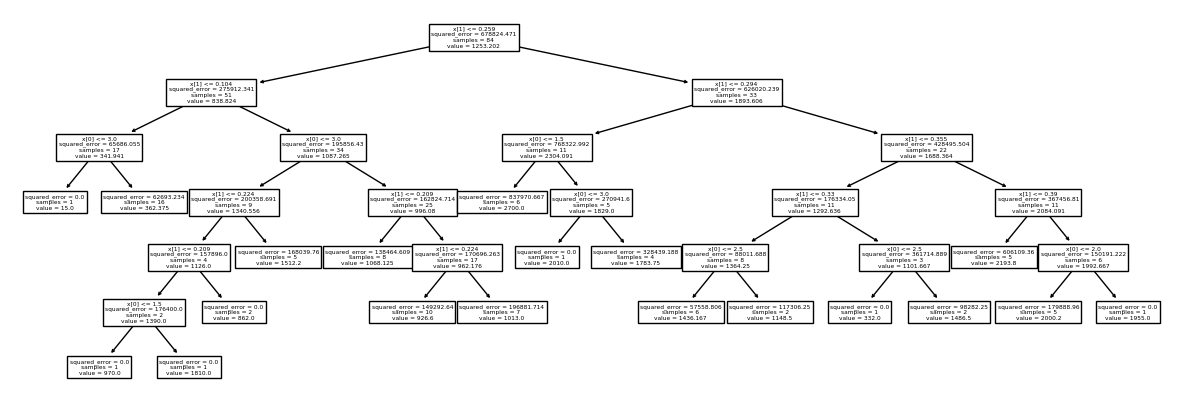

In [50]:
plt.figure(figsize=(15,5))
plot_tree(  fittedModel )

In [46]:
fittedModel

DecisionTreeRegressor(random_state=30)